In [436]:
# Explanations
'''
Abbrevations:
Q : Question, problem is wanting to be answered
S : Solution of the Question
df_tt : Dataframe has Titanic dataset.
SR: Surviving Ratio
DR: Dead Ratio
'''


'\nAbbrevations:\nQ : Question, problem is wanting to be answered\nS : Solution of the Question\ndf_tt : Dataframe has Titanic dataset.\nSR: Surviving Ratio\nDR: Dead Ratio\n'

In [437]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [438]:
PATH = "train.csv"
# Load data
df_tt = pd.read_csv(PATH)
print("Dataset is loaded..\n\n--------")

Dataset is loaded..

--------


In [439]:
# Examine data
print("\t  Data.info()\n\t----------------")
print(df_tt.info()) 

	  Data.info()
	----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [440]:
'''
Passenger Id : 
Survived : survived or not 
pclass : ticket class 1 = 1st , 2 = 2nd , 3= 3rd
sex : gender
age : age in years
sibsp : counts of sibling abord the Titanic
parch : counts of parents/children aboard the Titanic
ticket : ticket number
fare : passenger fare
cabin : cabin number
embarked : port of emberkation , C = Cherbourg , Q = Queenstown, S = Southampton
There are 12 columns and max 891 rows.
5 int64 , 5 object , 2 float
'''

'\nPassenger Id : \nSurvived : survived or not \npclass : ticket class 1 = 1st , 2 = 2nd , 3= 3rd\nsex : gender\nage : age in years\nsibsp : counts of sibling abord the Titanic\nparch : counts of parents/children aboard the Titanic\nticket : ticket number\nfare : passenger fare\ncabin : cabin number\nembarked : port of emberkation , C = Cherbourg , Q = Queenstown, S = Southampton\nThere are 12 columns and max 891 rows.\n5 int64 , 5 object , 2 float\n'

In [441]:
df_tt = df_tt.drop(['PassengerId','Name','Ticket'],axis=1)
#All information belongs to the first five passengers. First 5 rows.
#df_tt.head()
print("Question-1 -> Show all informations belongs to the first five passengers.")
print("\nSolution-1 ->\n ",df_tt.head())

Question-1 -> Show all informations belongs to the first five passengers.

Solution-1 ->
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S


In [442]:
#S1 - We can see our datas and also say that dataset has NaN values .

In [443]:
#Q2 - Show the size and dimension of the dataset (m,n) : m= counts of passengers , n=counts of features

print("\nQuestion-2 -> Shape of Data: ",df_tt.shape)


Question-2 -> Shape of Data:  (891, 9)


In [444]:
#S2 - Our data has 891 rows and 12 columns.  

In [445]:
#Q3 - Check Missing/NaN values.
missing_values = df_tt.isna().sum()
print("\nQuestion-3 -> Check Missing/NaN Values\n\tMissing Values' Counts\n")
print(missing_values)


Question-3 -> Check Missing/NaN Values
	Missing Values' Counts

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [446]:
'''
S3 - Age column has 177 NaN value, 
     Cabin column has 687 NaN value,
     Embarked column has only 2 NaN value,
     Other columns has no NaN values.
'''
df_tt = df_tt.drop('Cabin',axis=1)

# fill average by mean
avg_age = np.mean(df_tt.Age)
df_tt_filled = df_tt.copy()
df_tt_filled['Age'] = df_tt['Age'].fillna(avg_age)

In [447]:
df_tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


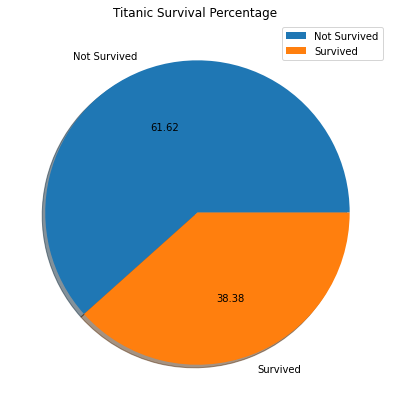


Question-4 -> Plot pie chart which shows the percentage of passengers are survived or not.
Plot saved your local disk as  pie_titanic_survival_percentage.png

Solution as numeric
0 : Not Survived
1 : Survived
	 Counts of Survivals
Not Survived  :  549
Survived  :  342


In [448]:
#Q4 - Plot pie chart which shows the percentage of passengers survived / not.
surviving_values = df_tt.get('Survived').value_counts()
surviving_values_dict = {'Not Survived':surviving_values[0],'Survived':surviving_values[1]}
plt.figure(figsize=(7,7))
plt.pie(surviving_values,labels=surviving_values_dict,autopct='%.2f',shadow=True)
plt.legend(surviving_values_dict,loc='best')
plt.title('Titanic Survival Percentage ')
plt_name = 'pie_titanic_survival_percentage.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-4 -> Plot pie chart which shows the percentage of passengers are survived or not.")
print("Plot saved your local disk as ", plt_name)
print("\nSolution as numeric")
print("0 : Not Survived\n1 : Survived\n\t Counts of Survivals")
for k,v in surviving_values_dict.items():
  print(k," : ",v)

In [449]:
#S4 - %61.62 person was not survived . Rest of these people it's mean %38.38 were survived.
#     %61.62 is equal 549 person. %38.38 is equal 342 person.

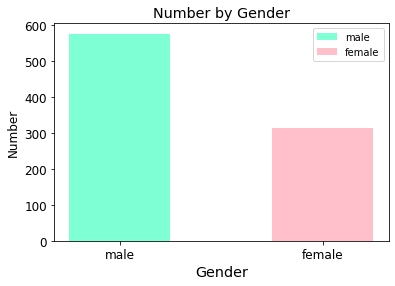


Question-5 -> Plot bar chart which shows number of female passengers and total male passengers.
Plot saved your local disk as  bar_Number_of_passengers_by_gender.png

Solution as numeric
 male      577
female    314
Name: Sex, dtype: int64


In [450]:
#Q5 - Plot bar chart which shows number of female passengers and total male passengers.
passenger_gender = df_tt.get('Sex').value_counts() # get number of genders
labels = df_tt.get('Sex').unique() # get male and female label
plt.bar(labels[0],height=passenger_gender[0],width=0.5,color='aquamarine')
plt.bar(labels[1],height=passenger_gender[1],width=0.5,color='pink')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel("Gender",fontsize='x-large')
plt.ylabel("Number",fontsize='large')
plt.title("Number by Gender",fontsize='x-large')
plt.legend(labels,loc='best',labelspacing=0.5)
plt_name ='bar_Number_of_passengers_by_gender.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-5 -> Plot bar chart which shows number of female passengers and total male passengers.")
print("Plot saved your local disk as ", plt_name)
print("\nSolution as numeric\n",passenger_gender)

In [451]:
#S5 - In bar chart we can see male passengers number bigger than female ones . Almost 2 times. And also we can see number of male passengers are close to 600. And female passengers number are almost 300 or more a bit.
# After examine bar chart i check my results typing print numbers of passengers by gender . Exact number of male passenger : 577 , female passenger: 314.


In [452]:
#Question 6 
df_survival_by_gender = pd.merge(df_tt.get('Survived'),df_tt.get('Sex'),left_index=True,right_index=True)

In [453]:
df_survival_by_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [454]:
male_survived,male_dead,female_survived,female_dead = 0,0,0,0
i = 0 #counter
total_row = df_survival_by_gender.shape[0] 
while (i < total_row):
  if df_survival_by_gender.get('Sex').values[i] == 'male':
    if df_survival_by_gender.get('Survived').values[i] == 0:
      male_dead = male_dead + 1
    else:
      male_survived = male_survived +1
  elif df_survival_by_gender.get('Sex').values[i] == 'female':
    if df_survival_by_gender.get('Survived').values[i] == 1:
      female_survived = female_survived +1
    else:
      female_dead = female_dead + 1 
  i = i + 1
'''
print("Gender\t  Total  = Survived + Dead")
print('Male   -> ','577   = ',male_survived,"    + ",male_dead)
print('Female -> ','314   = ',female_survived,"    + ",female_dead)
'''

'\nprint("Gender\t  Total  = Survived + Dead")\nprint(\'Male   -> \',\'577   = \',male_survived,"    + ",male_dead)\nprint(\'Female -> \',\'314   = \',female_survived,"    + ",female_dead)\n'

In [455]:
survival_by_gender_dict = {
    'Male-Dead' : male_dead,
    'Male-Survived':male_survived,
    'Female-Dead':female_dead,
    'Female-Survived':female_survived
}

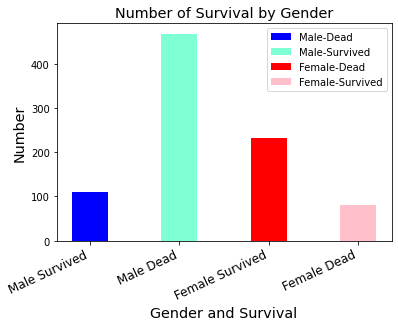


Question-6 -> Plot bar chart female and male who survived or not.
Plot saved your local disk as  bar_number_of_survival_by_gender.png

Solution as numeric
Gender	  Total  = Survived + Dead
Male   ->  577   =  109     +  468
Female ->  314   =  233     +  81


In [456]:
plt.bar(x='Male Survived',height=male_survived,width=0.4,color='blue')
plt.bar(x='Male Dead',height=male_dead,width=0.4,color='aquamarine')
plt.bar(x='Female Survived',height=female_survived,width=0.4,color='red')
plt.bar(x='Female Dead',height=female_dead,width=0.4,color='pink')

plt.xticks(fontsize='large',rotation=25,horizontalalignment='right')
plt.xlabel('Gender and Survival',fontsize='x-large')
plt.ylabel('Number',fontsize='x-large')
plt.title('Number of Survival by Gender',fontsize='x-large')
labels=survival_by_gender_dict.keys()
plt.legend(labels,loc='best')
plt_name = 'bar_number_of_survival_by_gender.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-6 -> Plot bar chart female and male who survived or not.")
print("Plot saved your local disk as ", plt_name)
print("\nSolution as numeric")

print("Gender\t  Total  = Survived + Dead")
print('Male   -> ','577   = ',male_survived,"    + ",male_dead)
print('Female -> ','314   = ',female_survived,"    + ",female_dead)

In [457]:
#S6 - Generally male persons were dead. Also surviving male is more than female dead....

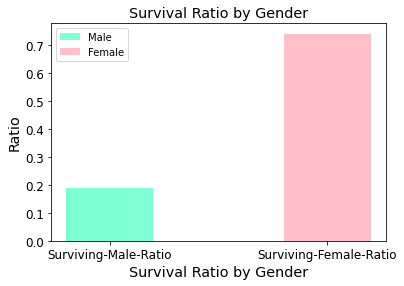


Question-7 -> Plot bar chart which shows Survival Ratios by gender.
Plot saved your local disk as  bar_survival_ratio_by_gender.png

Solution as numeric
	Ratios
Male_SR  :  0.18890814558058924
Male_DR  :  0.8110918544194108
Female_SR  :  0.7420382165605095
Female_DR  :  0.25796178343949044


In [458]:
#Q7 - Plot bar chart survival rate of female and male.
totalMale = male_dead + male_survived
surviving_ratio_male = male_survived / totalMale 
dead_ratio_male = male_dead / totalMale

totalFemale = female_dead + female_survived
surviving_ratio_female = female_survived / totalFemale
dead_ratio_female = female_dead / totalFemale

ratios = {
    'Male_SR':surviving_ratio_male,
    'Male_DR':dead_ratio_male,
    'Female_SR':surviving_ratio_female,
    'Female_DR':dead_ratio_female
}
labels = ['Male','Female']
plt.figure(figsize=(6,4))
plt.bar(x='Surviving-Male-Ratio',height=surviving_ratio_male,width=0.4,color='aquamarine')
plt.bar(x='Surviving-Female-Ratio',height=surviving_ratio_female,width=0.4,color='pink')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Survival Ratio by Gender',fontsize='x-large')
plt.ylabel('Ratio',fontsize='x-large')
plt.title('Survival Ratio by Gender',fontsize='x-large')
plt.legend(labels,loc='best')
plt_name = 'bar_survival_ratio_by_gender.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-7 -> Plot bar chart which shows Survival Ratios by gender.")
print("Plot saved your local disk as ", plt_name)
print("\nSolution as numeric")
print("\tRatios")
for k,v in ratios.items():
  print(k," : ",v)

In [459]:
'''
#S7 - Women are higher survival ratio than men. 
Men have Approximately %19-20 survival ratio ,women %79-80. 
It's mean every 100 male 80 is dead. 20 is survived.
Our dataset Total male 577 so survival is should be 577%19 = 109
In Each 100 women , %80 is survived,%20 is dead.
Interestingly,Women dead Ratio is smaller than Men Survival ratio....
'''

"\n#S7 - Women are higher survival ratio than men. \nMen have Approximately %19-20 survival ratio ,women %79-80. \nIt's mean every 100 male 80 is dead. 20 is survived.\nOur dataset Total male 577 so survival is should be 577%19 = 109\nIn Each 100 women , %80 is survived,%20 is dead.\nInterestingly,Women dead Ratio is smaller than Men Survival ratio....\n"

In [460]:
#Q8 - Create cross table pclass and survived.
print("\nQuestion-8 -> Create crosstable and shows which class has most survivor and which one has lowest survivor?")
ct_Q8 = pd.crosstab(df_tt.Pclass,df_tt.Survived,margins=True)


Question-8 -> Create crosstable and shows which class has most survivor and which one has lowest survivor?


In [461]:
print("\t CROSSTABLE- PClass and Survived\n\n")
print(ct_Q8)

	 CROSSTABLE- PClass and Survived


Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


In [462]:
# grouped_by_survived_pclass is a list and has (6,1) three records at the beginnig are 0 is mean not survived and 1-2-3 is class names. And then Last 3 , has (1,1),(1,2),(1,3). 1 is mean Survived, 1,2,3 pclass names. 
# code is below is return count of survived/not and pclass combination.
#s1 is equal survived 1 ...... ns1 is equal not survived its mean survived 0.
s1=ct_Q8.get(1)[1] 
s2=ct_Q8.get(1)[2] #Survived = 1 , Pclass = 2 
s3=ct_Q8.get(1)[3]
ns1=ct_Q8.get(0)[1] # Survived = 0 , Pclass = 1
ns2=ct_Q8.get(0)[2]
ns3=ct_Q8.get(0)[3]

crosstable_survived_pclass = { 'Survived in 1st Class':s1,
                              'Survived in 2nd Class':s2,
                              'Survived in 3rd Class':s3,
                              'Not Survived in 1st Class':ns1,
                              'Not Survived in 2nd Class':ns2,
                              'Not Survived in 3rd Class':ns3
    
}
print("                          Count")
for k,v in crosstable_survived_pclass.items():
  print(k," : ",v)

s = np.array([s1,s3,s2])
idx= s.argsort() # kücükten büyüge indekslere göre sıralar.
smallest = s[idx[0]] # en kücük sayı en basta odlugunda 0 
biggest = s[idx[-1]]  # en büyük sayı sonda
##

#Değerler kümesi içerisinde değer araması yapılarak hangi indekste olduğunu bulup aynı indeksteki key değerini döndürerek class ismine ulaştım.
Lowest_Class = list(crosstable_survived_pclass.keys())[list(crosstable_survived_pclass.values()).index(smallest)]
Most_Class = list(crosstable_survived_pclass.keys())[list(crosstable_survived_pclass.values()).index(biggest)]

print("Most Survivor is in the ",Most_Class[-9:])
print("Lowest Survivor is in the ",Lowest_Class[-9:])

class1st = s1 / (s1+ns1)
class2nd = s2 / (s2+ns2)
class3rd = s3 / (s3+ns3)
ratios_each_class = {'1st':class1st,
                     '2nd':class2nd,
                     '3rd':class3rd}
print("\n\nSurvivors Ratios for each class")
for k,v in ratios_each_class.items():
  print(k," : {:.4f}".format(v))



                          Count
Survived in 1st Class  :  136
Survived in 2nd Class  :  87
Survived in 3rd Class  :  119
Not Survived in 1st Class  :  80
Not Survived in 2nd Class  :  97
Not Survived in 3rd Class  :  372
Most Survivor is in the  1st Class
Lowest Survivor is in the  2nd Class


Survivors Ratios for each class
1st  : 0.6296
2nd  : 0.4728
3rd  : 0.2424


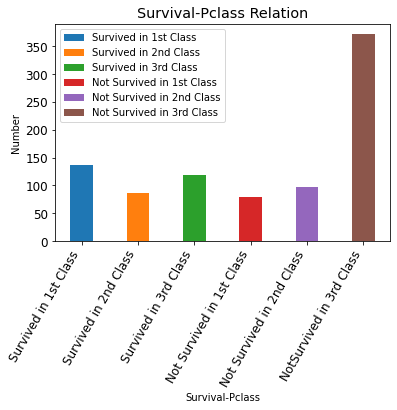


Question-9 -> Plot bar chart shows passengers who survived or not survived for each class.
Plot saved your local disk as  bar_Number_of_survival_pclass.png


In [463]:
#Q9 - Plot bar chart who survived or not survived for each class.
def barCiz(x,h,w):
  plt.bar(x=x,height=h,width=w)

barCiz('Survived in 1st Class',s1,0.4)
barCiz('Survived in 2nd Class',s2,0.4)
barCiz('Survived in 3rd Class',s3,0.4)
barCiz('Not Survived in 1st Class',ns1,0.4)
barCiz('Not Survived in 2nd Class',ns2,0.4)
barCiz('NotSurvived in 3rd Class',ns3,0.4)

plt.title("Survival-Pclass Relation",fontsize='x-large')
plt.xticks(rotation=60,horizontalalignment='right',fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Survival-Pclass')
plt.ylabel('Number')
labels = crosstable_survived_pclass.keys()
plt.legend(labels, loc='best')
plt_name= 'bar_Number_of_survival_pclass.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-9 -> Plot bar chart shows passengers who survived or not survived for each class.")
print("Plot saved your local disk as ",plt_name)

In [464]:
#Q10 -Create crosstable Survived,Pclass and Sex.
ct_Q10 = pd.crosstab([df_tt_filled.Sex,df_tt_filled.Survived],df_tt_filled.Pclass,margins=True)
print("\nQuestion-10 -> Create crosstable, Survived,Pclass,Sex.")
print("\t CROSSTABLE - Survived,Pclass and Sex\n\n")
print(ct_Q10)



Question-10 -> Create crosstable, Survived,Pclass,Sex.
	 CROSSTABLE - Survived,Pclass and Sex


Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891


In [465]:
ct_Q10.get('All')[0]

81

In [466]:
male_df = ct_Q10.get('All')[2] +ct_Q10.get('All')[3] # 2 = male(2) and survived=0 , 3 = male(2) and survived=1  
female_df = ct_Q10.get('All')[0] +ct_Q10.get('All')[1] # 0 = female(1) and survived=0 , 1 = female(1) and survived=1

male_survivors_ratio = ct_Q10.get('All')[3] / male_df
female_survivors_ratio = ct_Q10.get('All')[1] / female_df
print("\nQuestion-10 -> Which one is higher survival ratio?")
if male_survivors_ratio > female_survivors_ratio:
  print(":Male is higher.")
elif male_survivors_ratio < female_survivors_ratio:
  print(":Female is higher.")
else:
  print(":Is equal.")


Question-10 -> Which one is higher survival ratio?
:Female is higher.


In [467]:
#Preprocessing for rest of questions.
#Age column has NaN values. I filled NaN values mean of age column.


#Q11 - Oldest Passenger
oldest = np.max(df_tt.Age)

#Q12 - Youngest Passenger
youngest = np.min(df_tt.Age)

#Q13 - Average age of Passengers
avg = np.mean(df_tt.Age)

#Show results 
print('\nQuestion-11 -> Age of Oldest Passenger: ',oldest,
      '\n\nQuestion-12 -> Age of Youngest Passenger: ',youngest,
      '\n\nQuestion-13 -> Average of Passengers Age: %.2f'%avg)


Question-11 -> Age of Oldest Passenger:  80.0 

Question-12 -> Age of Youngest Passenger:  0.42 

Question-13 -> Average of Passengers Age: 29.70


In [468]:
#Q14 - Plot histogram Age Distribution on Survived 
age_and_survival = pd.merge(df_tt_filled['Survived'],df_tt_filled['Age'],left_index=True,right_index=True)
age_and_survival_groupby_survived = list(age_and_survival.groupby('Survived'))


In [469]:
df_survivors_age = age_and_survival_groupby_survived[1][1] #survivors dataframe . 
survivors_ages = df_survivors_age.Age # get survivors age 

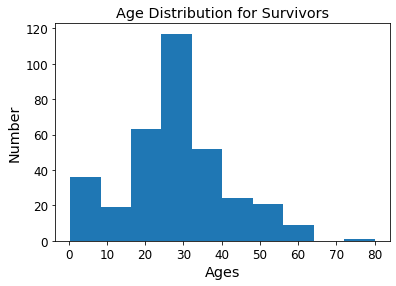


Question-14 -> Plot hist age distribution on survived.
Plot saved your local disk as  hist_age_distribution_survivors.png


In [470]:
plt.hist(survivors_ages,bins=10)
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Ages',fontsize='x-large')
plt.ylabel('Number',fontsize='x-large')
plt.title('Age Distribution for Survivors',fontsize='x-large')
plt_name ='hist_age_distribution_survivors.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-14 -> Plot hist age distribution on survived.")
print("Plot saved your local disk as ",plt_name)

In [471]:
#Q15 -- plot hist age distribution on not survive
df_no_survivors_age = age_and_survival_groupby_survived[0][1]
no_survivors_ages= df_no_survivors_age.Age

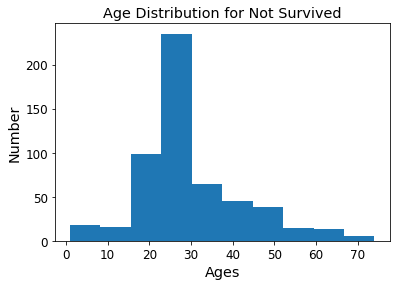


Question-15 -> Plot hist age distribution on not survived.
Plot saved your local disk as  hist_age_distribution_no_survivors.png


In [472]:
plt.hist(no_survivors_ages,bins=10)
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Ages',fontsize='x-large')
plt.ylabel('Number',fontsize='x-large')
plt.title('Age Distribution for Not Survived',fontsize='x-large')
plt_name = 'hist_age_distribution_no_survivors.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-15 -> Plot hist age distribution on not survived.")
print("Plot saved your local disk as ",plt_name)

In [473]:
'''
Q-14 :
 The most survivors are people in their 30s.
 It also appears that children under the age of 10 have a much better chance of survival than death.
 It is observed that the survival rate of young people is higher in general, except for young people between the ages of 10-20.

Q-15 : The people who die the most are between the ages of 20-30. 
Young people and older people seem to be more likely to survive. 
Young people are considered to be younger than 10 years old and over 50 years old.   
'''

'\nQ-14 :\n The most survivors are people in their 30s.\n It also appears that children under the age of 10 have a much better chance of survival than death.\n It is observed that the survival rate of young people is higher in general, except for young people between the ages of 10-20.\n\nQ-15 : The people who die the most are between the ages of 20-30. \nYoung people and older people seem to be more likely to survive. \nYoung people are considered to be younger than 10 years old and over 50 years old.   \n'

In [474]:
#Q16 -- Fare
df_tt_filled.Fare.isna().any()
df_tt_filled.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [475]:
#Q16
lowest_fare = np.min(df_tt_filled.Fare)
#Q17
highest_fare = np.max(df_tt_filled.Fare)
#Q18
avg_fare = np.mean(df_tt_filled.Fare)

fare_dict = {
    'lowest fare':lowest_fare,
    'highest fare':highest_fare,
    'average fare':avg_fare
}

print("\nQuestion-16-17-18 -> Show lowest fare, highest fare and average fare.")
#Show results
i = 16
for k,v in fare_dict.items():
  print("\nQuestion-",i," -> ",k," : %.2f"%v)
  i = i +1



Question-16-17-18 -> Show lowest fare, highest fare and average fare.

Question- 16  ->  lowest fare  : 0.00

Question- 17  ->  highest fare  : 512.33

Question- 18  ->  average fare  : 32.20


In [476]:
import seaborn as sns

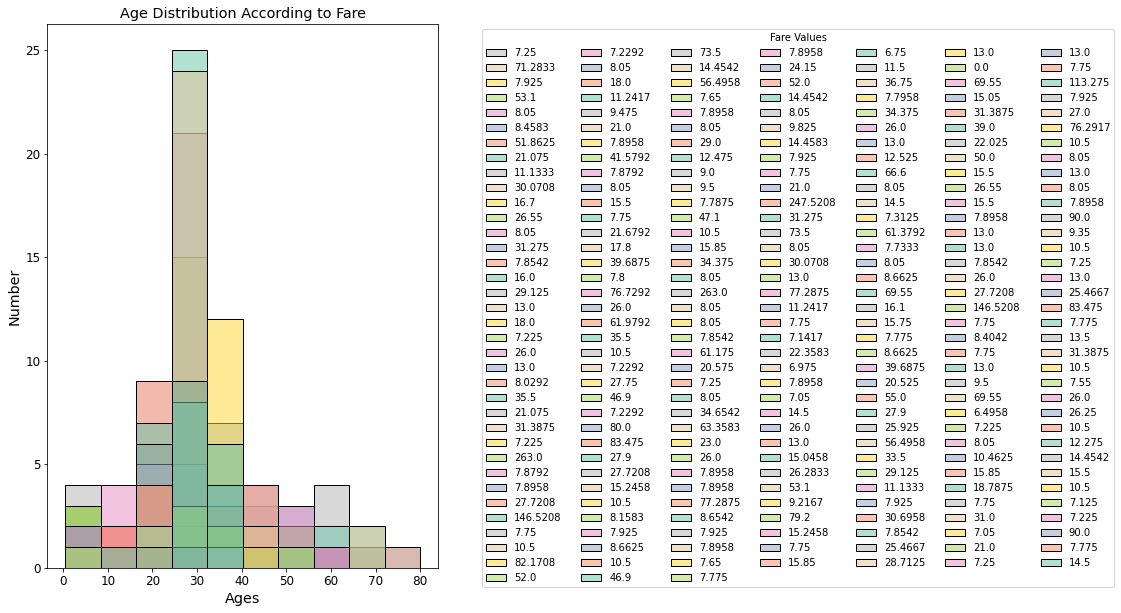


Question-19 ->  Please plot the histogram that shows the distribution of passengers according to the fare theypaid. (You should have 10 bins for the range of the ages.) 
Plot saved your local disk as  bar_age_distribution_by_fare.png


In [477]:
#Q19 - Please plot the histogram that shows the distribution of passengers according to the fare theypaid. (You should have 10 bins for the range of the ages.)
fares  = dict(df_tt_filled.Fare)
labels = fares.values()
plt.figure(figsize=(7,10))
sns.histplot(data=df_tt_filled,x='Age',hue='Fare',bins=10,palette='Set2')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Ages',fontsize='x-large')
plt.ylabel('Number',fontsize='x-large')
plt.title('Age Distribution According to Fare',fontsize='x-large')
plt.legend(labels=labels,ncol=7,loc='best',bbox_to_anchor=(1.1,1),title='Fare Values')
plt_name= 'bar_age_distribution_by_fare.png'
plt.savefig(plt_name)
plt.show()
print("\nQuestion-19 ->  Please plot the histogram that shows the distribution of passengers according to the fare theypaid. (You should have 10 bins for the range of the ages.) ")
print("Plot saved your local disk as ", plt_name)

In [478]:
#Q20 - Are there any children under the age of 10 traveling without their parents? What might this indicate?
'''
sibsp : counts of sibling abord the Titanic
parch : counts of parents/children aboard the Titanic
'''#Aile üyesi parent 0 olup age<10 ise .
print("\nQuestion-20 : Are there any children under the age of 10 traveling without their parents?")
smaller10_idx = []
wanted = []

#Loop 1 : Look all indexes in Age , If the person is at index smaller than 10 as age, then get the index and add the smaller10_idx list.
for i  in df_tt_filled.Age.keys():
  if df_tt_filled.Age[i] <10:
    smaller10_idx.append(i)
    smaller10.append(df_tt_filled.Age[i])

#Loop 2 : Index which is child's age smaller than 10 years and Parch is equal 0. It's mean the person is at the index has no child or parent. 
for i in smaller10_idx:
  if df_tt_filled.Parch[i] == 0:
    wanted.append(i)
#If Clause : If Wanted has any value, it's mean there is child who has no parent and smaller 10 years old.
if len(wanted) >0:
  print("True")




Question-20 : Are there any children under the age of 10 traveling without their parents?
True
